# Used Cars Prices

## Introduction



We begin with data that captures various features and prices from used car ads placed on the leading online catalog in Belarus. This data will present a number of questions about the nature of used car pricing. Exploration of these questions, the features, and how the features relate will allow us to draw some conclusions about the features that most affect pricing. As you'll see, the most obvious drivers of car price are the year produced, odometer value, and add-on features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cars.csv')

Below are the 30 features captured including price with the first 5 rows of data transposed.

In [3]:
df.head().T

,0,1,2,3,4
manufacturer_name,Subaru,Subaru,Subaru,Subaru,Subaru
model_name,Outback,Outback,Forester,Impreza,Legacy
transmission,automatic,automatic,automatic,mechanical,automatic
color,silver,blue,red,blue,black
odometer_value,190000,290000,402000,10000,280000
year_produced,2010,2002,2001,1999,2001
engine_fuel,gasoline,gasoline,gasoline,gasoline,gasoline
engine_has_gas,False,False,False,False,False
engine_type,gasoline,gasoline,gasoline,gasoline,gasoline
engine_capacity,2.5,3.0,2.5,3.0,2.5


The dataset is complete with the exception of 10 null values for engine capacity. Given the large quantity of non-null values in all other features, we drop the 10 rows of data with missing engine capacity. 

In [4]:
df.dropna(inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38521 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38521 non-null  object 
 1   model_name         38521 non-null  object 
 2   transmission       38521 non-null  object 
 3   color              38521 non-null  object 
 4   odometer_value     38521 non-null  int64  
 5   year_produced      38521 non-null  int64  
 6   engine_fuel        38521 non-null  object 
 7   engine_has_gas     38521 non-null  bool   
 8   engine_type        38521 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38521 non-null  object 
 11  has_warranty       38521 non-null  bool   
 12  state              38521 non-null  object 
 13  drivetrain         38521 non-null  object 
 14  price_usd          38521 non-null  float64
 15  is_exchangeable    38521 non-null  bool   
 16  location_region    385

Are there any obvious correlations between pricing and any of the features? Looking at a heatmap plot of the Pearson correlation coefficients, we see a few interesting correlations to help guide our intial exploration:

- Moderate negative correlation between price and odometer value
- Strong positive correlation between price and year produced
- Moderate positive correlations between price and features 3 & 5 through 8

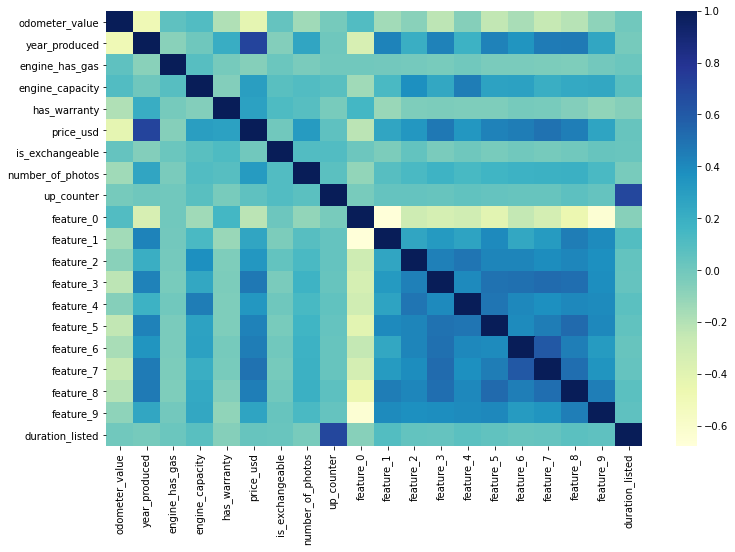

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='YlGnBu');

With pricing as our main feature of interest, let's begin with looking at the distribution of prices.

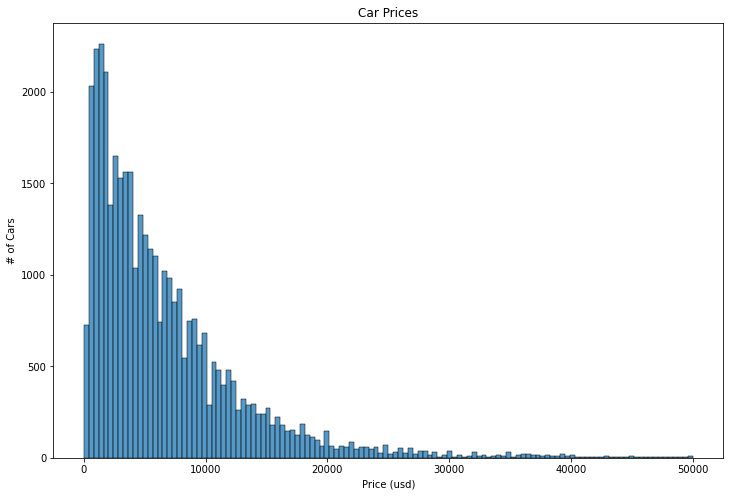

In [7]:
plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='price_usd', stat='count')
ax.set_title('Car Prices')
ax.set_xlabel('Price (usd)')
ax.set_ylabel('# of Cars')
plt.ticklabel_format(style='plain', axis='x');

There is a surprisingly high count of car prices around the $0 mark. What are the actual values there? We know that the production year and odometer value are correlated with price so we can evaluate if that is what's driving the low prices.

In [8]:
df['price_usd'][df['price_usd'] < 100].value_counts(ascending=True)

9.49     1
1.42     1
94.85    1
60.00    1
10.00    2
1.00     5
Name: price_usd, dtype: int64

Very few cars are priced below 100 dollars. Let's take a look at all cars priced below 500 dollars and see how they relate to production year and odometer value.

In [9]:
low_prices = df.loc[df['price_usd'] < 500]

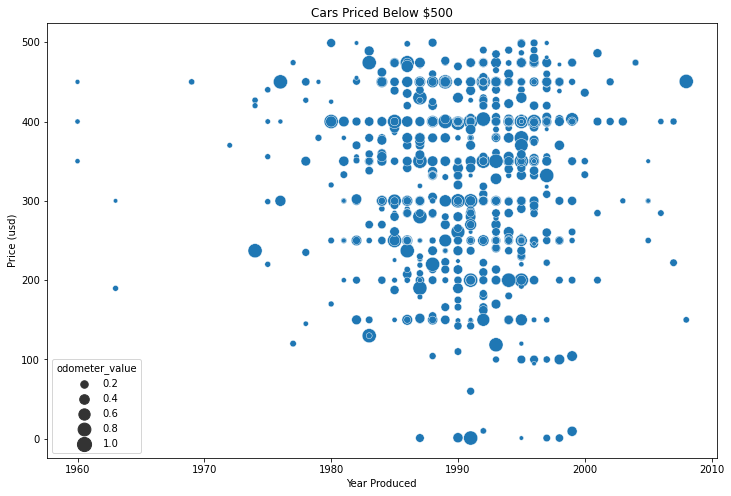

In [10]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='year_produced', y='price_usd', data=low_prices, size='odometer_value', sizes=(20,200))
ax.set_title('Cars Priced Below $500')
ax.set_xlabel('Year Produced')
ax.set_ylabel('Price (usd)')
plt.ticklabel_format(style='plain', axis='x');

There is no apparent relationship here so we conclude that these are most likely typos or bait pricing to help draw attention to the ad. Many ad placements will list at a very low price point and ask to be contacted for actual selling price.

A couple other distributions for us to view are odometer values and production years.

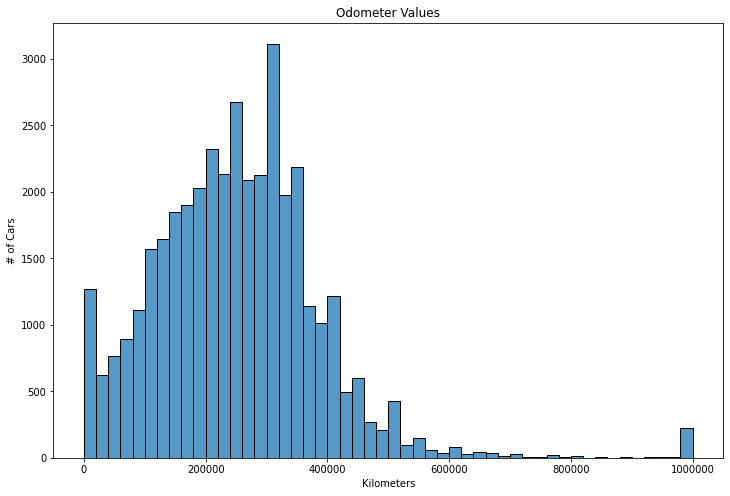

In [11]:
plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='odometer_value', stat='count', bins=50)
ax.set_title('Odometer Values')
ax.set_xlabel('Kilometers')
ax.set_ylabel('# of Cars')
plt.ticklabel_format(style='plain', axis='x');

Odometer values appear to have a near normal distribution with a mean around 250k KM and outliers at the tails. The distribution of production year is skewed toward cars made in the last 25 years with a mean production year in the early 2000's.

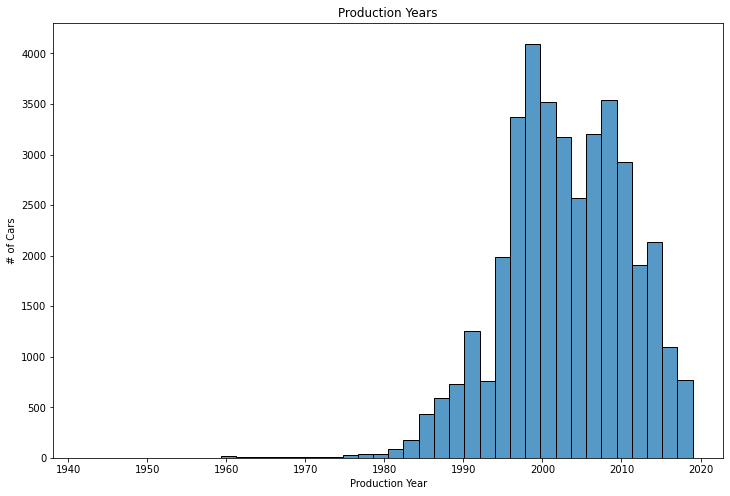

In [12]:
plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='year_produced', stat='count', bins=40)
ax.set_title('Production Years')
ax.set_xlabel('Production Year')
ax.set_ylabel('# of Cars')
plt.ticklabel_format(style='plain', axis='x');

Let's now focus on the correlation relationships we discovered in the beginning. We begin with the most obvious, price vs. year produced.

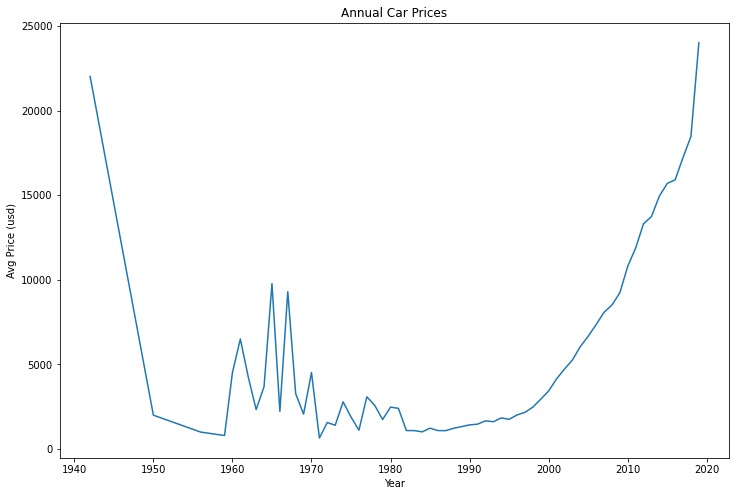

In [13]:
yearly_price = df.groupby('year_produced', as_index = False)['price_usd'].mean()

plt.figure(figsize=(12,8))
ax = sns.lineplot(data=yearly_price, x='year_produced', y='price_usd')
ax.set_title('Annual Car Prices')
ax.set_xlabel('Year')
ax.set_ylabel('Avg Price (usd)');

As expected, we see that the average car price increases with production year. There are some interesting anomalies prior to 1982. Cars made more than 30 years ago are often designated as classic or vintage and can have greater value to car collectors. We see the oldest cars made in the 1940s are priced similar to vehicles made in the last 10 years.

Below we plot the relationship between price and odometer value. The plot confirms the negative correlation although the relationship is less obvious in lower priced, lower odometer value vehicles. 

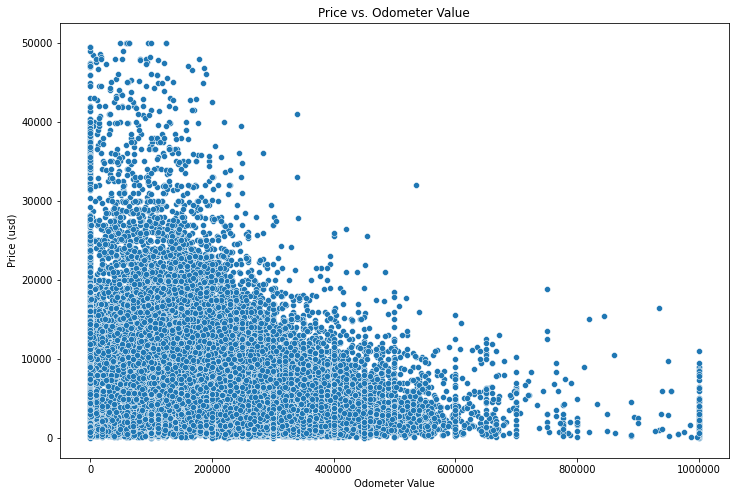

In [14]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='odometer_value', y='price_usd', data=df)
ax.set_title('Price vs. Odometer Value')
ax.set_xlabel('Odometer Value')
ax.set_ylabel('Price (usd)')
plt.ticklabel_format(style='plain', axis='x');

One final relationship for us to explore is that of price vs. features. We'll use feature 3 as it has the strongest correlation with price. The plot below shows car prices for cars without and with feature 3, in that order. 

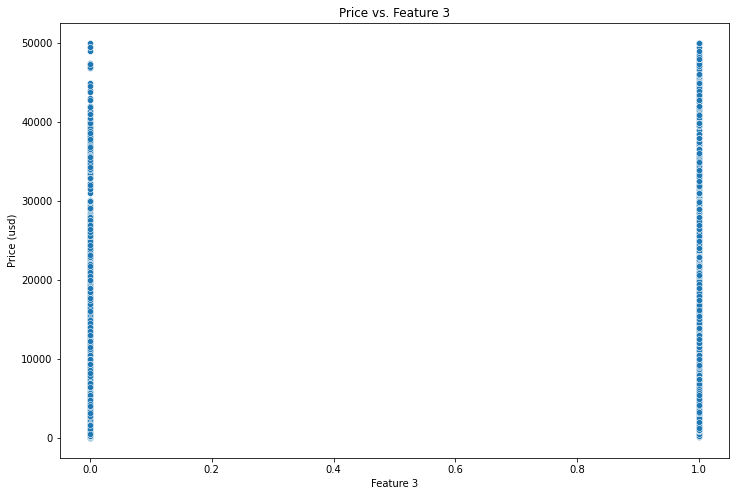

In [15]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='feature_3', y='price_usd', data=df)
ax.set_title('Price vs. Feature 3')
ax.set_xlabel('Feature 3')
ax.set_ylabel('Price (usd)')
plt.ticklabel_format(style='plain', axis='x');

Given that the plot isn't very helpful in gaining any insight into the data, we'll compare the average car price of those without feature 3 to the average price of those with feature 3.

In [16]:
without = np.round(df['price_usd'][df['feature_3'] == 0].mean(), 2)
with_ = np.round(df['price_usd'][df['feature_3'] == 1].mean(), 2)
print(f'The avg car price WITHOUT feature 3 is ${without}')
print(f'The avg car price WITH feature 3 is ${with_}')

The avg car price WITHOUT feature 3 is $4771.04
The avg car price WITH feature 3 is $11539.87


This confirms that having a feature included in the vehicle allows for a higher price. 

Now that we have a good sense of the data features that affect car price, let's ask a more specific question. Which manufacturers and which models have the highest average car prices?

In [17]:
model_price = df.groupby(['manufacturer_name'], as_index = False)['price_usd'].mean()
model_price.nlargest(10, 'price_usd')

,manufacturer_name,price_usd
38,Porsche,18629.823770
21,Jaguar,17813.000000
27,Lexus,17130.560845
26,Land Rover,15195.300380
43,Skoda,13795.448466
19,Infiniti,13794.604938
32,Mini,13133.700882
4,Buick,12876.319149
0,Acura,12772.885909
5,Cadillac,11093.124651


We see a list of the top 10 manufacturers for price and find a familiar list of high end manufacturers at the top. What about the specific models?

In [18]:
model_price = df.groupby(['manufacturer_name', 'model_name'], as_index = False)['price_usd'].mean()
model_price.nlargest(10, 'price_usd')

,manufacturer_name,model_name,price_usd
424,Jaguar,F-Type,50000.000000
593,Mercedes-Benz,CLS63 AMG,49900.000000
631,Mercedes-Benz,GLC200,49416.400000
627,Mercedes-Benz,GL63,48499.500000
678,Mercedes-Benz,SLC200,48000.000000
1058,Volvo,V90,44800.000000
635,Mercedes-Benz,GLE350,43406.730000
634,Mercedes-Benz,GLE300,42375.000000
685,Mercedes-Benz,V250,41995.400000
841,Porsche,Macan,40766.666667


The most frequent manufacturer of the highest priced models didn't even make the manufacturers top 10 list! There most be a large count of Mercedes-Benz cars with very low prices. The most expensive model is the F-Type made by Jaguar.

## Conclusion

Given around 30 features for used cars selling online in Belarus, we were able to determine the top 3 features that affect price. Those features are production year, odometer value, and presence of add-on features. The production year is interesting because while cars get cheaper as they age, very old cars of more than 30 years regain value above cars that are 20-30 years old. Because cars deteriote with usage, the higher values on the odometer relates to lower prices as you will have less time to use the car. Finally, various add-on features can add comfort and/or perfomance and drive increases in pricing. 

If you are in the market for buying a used car in Belarus, and you want to find a bargain, look for older cars with higher odometer values and fewer features. Should you be in the market for a very expensive vehicle, aim for Porsche, Jaguar, Lexus or a variety of Mercedes-Benz models.